In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
from autoimpute.imputations import MiceImputer

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data=pd.read_csv("C:\\Users\\sachi\\Downloads\\widsdatathon2021\\UnlabeledWiDS2021.csv")

In [5]:
data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,130.0,36.4,NaN,0,5.4,NaN,NaN,104.0,40.0,104.0,40.0,66.0,38.0,NaN,NaN,123.0,54.0,123.0,54.0,35.0,15.0,100.0,96.0,NaN,NaN,149.0,76.0,149.0,76.0,38.7,35.6,NaN,NaN,59.0,59.0,59.0,59.0,46.0,44.0,NaN,NaN,80.0,80.0,80.0,80.0,19.0,19.0,97.0,96.0,NaN,NaN,116.0,116.0,116.0,116.0,36.4,36.4,2.8,2.8,1.9,1.9,44.0,40.0,9.8,9.3,1.49,1.44,104.0,97.0,26.0,23.0,14.5,14.2,42.8,39.9,NaN,NaN,NaN,NaN,173.0,173.0,5.7,4.9,132.0,130.0,5.6,5.4,2.8,2.8,1.9,1.9,40.0,40.0,9.8,9.8,1.49,1.49,104.0,104.0,26.0,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,142.0,36.3,NaN,0,NaN,NaN,NaN,101.0,27.0,101.0

In [6]:
del data['Unnamed: 0']

In [7]:
data.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,130.0,36.4,NaN,0,5.4,NaN,NaN,104.0,40.0,104.0,40.0,66.0,38.0,NaN,NaN,123.0,54.0,123.0,54.0,35.0,15.0,100.0,96.0,NaN,NaN,149.0,76.0,149.0,76.0,38.7,35.6,NaN,NaN,59.0,59.0,59.0,59.0,46.0,44.0,NaN,NaN,80.0,80.0,80.0,80.0,19.0,19.0,97.0,96.0,NaN,NaN,116.0,116.0,116.0,116.0,36.4,36.4,2.8,2.8,1.9,1.9,44.0,40.0,9.8,9.3,1.49,1.44,104.0,97.0,26.0,23.0,14.5,14.2,42.8,39.9,NaN,NaN,NaN,NaN,173.0,173.0,5.7,4.9,132.0,130.0,5.6,5.4,2.8,2.8,1.9,1.9,40.0,40.0,9.8,9.8,1.49,1.49,104.0,104.0,26.0,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,142.0,36.3,NaN,0,NaN,NaN,NaN,101.0,27.0,101.0,27.0,116.0,56.

In [8]:
data_raw=data.copy()

In [9]:
data.shape

(10234, 179)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Columns: 179 entries, encounter_id to solid_tumor_with_metastasis
dtypes: float64(156), int64(17), object(6)
memory usage: 14.0+ MB


In [11]:
data.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,10234.000000,10234.000000,10234.000000,9219.000000,10234.000000,9933.000000,10234.000000,10234.000000,10234.0,9326.000000,4179.000000,10064.000000,10126.000000,10234.000000,10234.000000,3924.000000,8173.000000,8191.000000,2599.000000,10029.000000,10029.000000,10173.000000,10029.000000,9024.000000,10204.000000,8120.000000,10234.000000,10182.000000,2599.000000,2599.000000,2599.000000,2599.000000,10170.000000,8241.000000,9563.000000,5044.000000,10234.000000,7858.000000,2909.000000,2909.000000,10211.000000,10211.000000,10085.000000,10085.000000,10210.000000,10210.000000,2919.000000,2919.000000,10197.000000,10197.000000,10022.000000,10022.000000,10179.000000,10179.000000,10172.000000,10172.000000,2912.000000,2912.000000,10211.000000,10211.000000,10086.000000,10086.000000,9804.000000,9804.000000,2061.000000,2061.000000,9582.000000,9582.000000,9078.000000,9078.000000,9683.000000,9683.000000,2048.000000,2048.000000,9437.000000,9437.000000,8845.000000,8845.000000,9510.000000,9510.000000,9508.000000,9508.000000,2064.000000,2064.000000,9583.000000,9583.000000,9079.000000,9079.000000,7580.000000,7580.000000,4694.000000,4694.000000,4374.000000,4374.000000,9126.000000,9126.000000,8832.000000,

In [12]:
data.describe(include='all')

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,10234.000000,10234.000000,10234.000000,9219.000000,10234.000000,10030,10229,9933.000000,7501,10209,10234.000000,10234,10234,10234.000000,10234.0,9326.000000,4179.000000,10064.000000,10126.000000,10234.000000,10234.000000,3924.000000,8173.000000,8191.000000,2599.000000,10029.000000,10029.000000,10173.000000,10029.000000,9024.000000,10204.000000,8120.000000,10234.000000,10182.000000,2599.000000,2599.000000,2599.000000,2599.000000,10170.000000,8241.000000,9563.000000,5044.000000,10234.000000,7858.000000,2909.000000,2909.000000,10211.000000,10211.000000,10085.000000,10085.000000,10210.000000,10210.000000,2919.000000,2919.000000,10197.000000,10197.000000,10022.000000,10022.000000,10179.000000,10179.000000,10172.000000,10172.000000,2912.000000,2912.000000,10211.000000,10211.000000,10086.000000,10086.000000,9804.000000,9804.000000,2061.000000,2061.000000,9582.000000,9582.000000,9078.000000,9078.000000,9683.000000,9683.000000,2048.000000,2048.000000,9437.000000,9437.000000,8845.000000,8845.000000,9510.000000,9510.000000,9508.000000,9508.000000,2064.000000,2064.000000,9583.000000,9583.000000,9079.000000,9079.0

<AxesSubplot:>

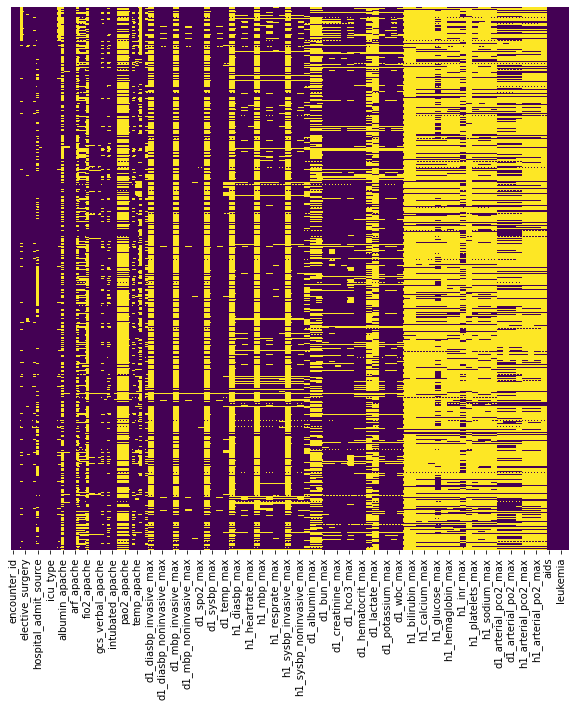

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [14]:
many_missing_cols=['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_wbc_max',
 'h1_wbc_min',
 'h1_arterial_pco2_max',
 'h1_arterial_pco2_min',
 'h1_arterial_ph_max',
 'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

In [15]:
low_correlations=['d1_diasbp_min',
 'd1_hco3_min',
 'd1_diasbp_noninvasive_min',
 'h1_diasbp_max',
 'd1_mbp_invasive_min',
 'sodium_apache',
 'h1_arterial_po2_min',
 'bilirubin_apache',
 'h1_diasbp_noninvasive_max',
 'h1_sodium_max',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'h1_sodium_min',
 'pao2_apache',
 'h1_pao2fio2ratio_min',
 'd1_arterial_po2_min',
 'h1_arterial_ph_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_pao2fio2ratio_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'h1_arterial_po2_max',
 'h1_arterial_ph_max',
 'albumin_apache',
 'd1_heartrate_max',
 'd1_albumin_min',
 'h1_mbp_min',
 'd1_resprate_min',
 'd1_arterial_ph_max',
 'h1_mbp_invasive_max',
 'd1_albumin_max',
 'ph_apache',
 'h1_mbp_noninvasive_min',
 'd1_pao2fio2ratio_min',
 'd1_mbp_min',
 'd1_sodium_max',
 'icu_id',
 'heart_rate_apache',
 'd1_mbp_noninvasive_min',
 'd1_diasbp_max',
 'd1_diasbp_noninvasive_max',
 'd1_pao2fio2ratio_max',
 'solid_tumor_with_metastasis',
 'gcs_unable_apache',
 'fio2_apache',
 'apache_post_operative',
 'h1_albumin_max',
 'h1_albumin_min',
 'aids',
 'h1_heartrate_max',
 'apache_3j_diagnosis',
 'd1_temp_max',
 'd1_hco3_max',
 'h1_temp_min',
 'resprate_apache',
 'h1_temp_max',
 'temp_apache',
 'd1_temp_min',
 'h1_mbp_max',
 'h1_arterial_pco2_min',
 'd1_lactate_max',
 'elective_surgery',
 'h1_resprate_min',
 'height',
 'h1_mbp_noninvasive_max',
 'd1_lactate_min',
 'h1_sysbp_invasive_min',
 'immunosuppression',
 'encounter_id',
 'h1_arterial_pco2_max',
 'intubated_apache',
 'lymphoma',
 'h1_spo2_min',
 'h1_lactate_min',
 'h1_lactate_max',
 'd1_mbp_invasive_max',
 'hospital_id',
 'h1_heartrate_min',
 'map_apache',
 'd1_arterial_pco2_max',
 'leukemia',
 'apache_2_diagnosis',
 'd1_spo2_min',
 'd1_arterial_pco2_min',
 'h1_resprate_max',
 'd1_resprate_max',
 'd1_wbc_max',
 'wbc_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'd1_sysbp_invasive_min',
 'hepatic_failure',
 'd1_wbc_min',
 'ventilated_apache',
 'd1_spo2_max',
 'h1_spo2_max',
 'urineoutput_apache',
 'cirrhosis',
 'h1_wbc_min',
 'h1_wbc_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_noninvasive_max',
 'gcs_verbal_apache',
 'pre_icu_los_days',
 'd1_inr_max',
 'h1_inr_max',
 'd1_platelets_max',
 'gcs_motor_apache',
 'd1_calcium_min',
 'gcs_eyes_apache',
 'd1_platelets_min',
 'h1_sysbp_min',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_min',
 'd1_inr_min',
 'h1_inr_min',
 'h1_sysbp_noninvasive_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_sysbp_invasive_max',
 'd1_potassium_min',
 'd1_calcium_max',
 'h1_sysbp_max',
 'h1_sysbp_noninvasive_max']

In [16]:
data['readmission_status'].value_counts()

0    10234
Name: readmission_status, dtype: int64

In [17]:
del_cols=low_correlations+['readmission_status']+many_missing_cols

In [18]:
data.drop(del_cols, axis=1,inplace=True)

In [19]:
data.shape

(10234, 41)

<AxesSubplot:>

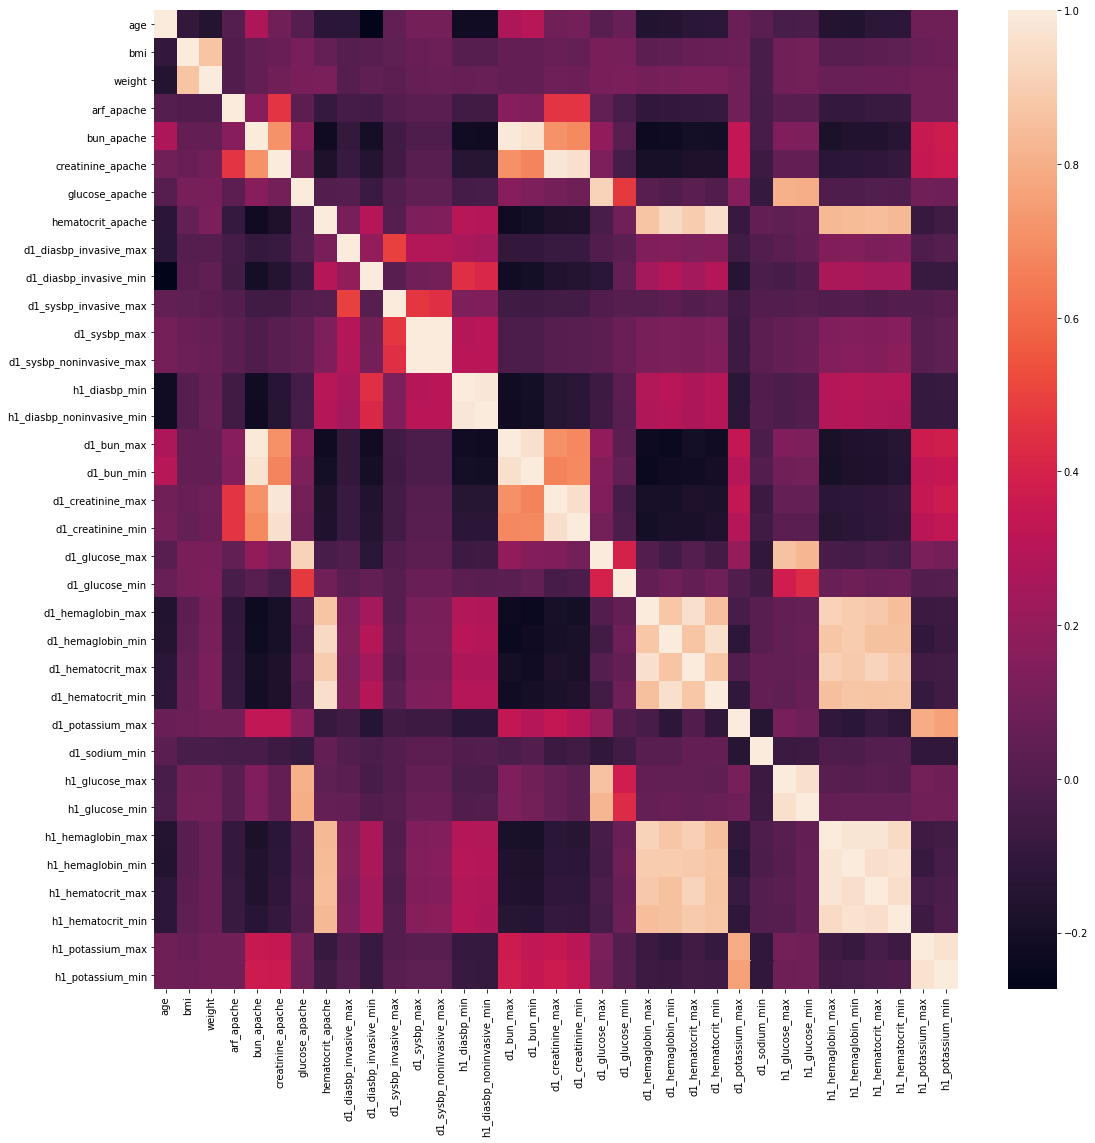

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr())

In [21]:
data.drop(['d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','h1_glucose_max','d1_sysbp_max','d1_bun_max', 'd1_creatinine_max','h1_diasbp_noninvasive_min' ], axis=1, inplace= True)

In [22]:
data.shape

(10234, 33)

In [23]:
data.drop(['bmi'],axis=1, inplace=True)

In [24]:
data['age']=data['age'].replace([0],np.nan)

In [25]:
numerical_cols=data._get_numeric_data()

In [26]:
data[data['age']==0]

,age,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,hematocrit_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_noninvasive_max,h1_diasbp_min,d1_bun_min,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_min,d1_potassium_max,d1_sodium_min,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_potassium_max,h1_potassium_min


In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

In [28]:
si=SimpleImputer(strategy='most_frequent')

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
mice=IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman')

In [30]:
numerical_cols.iloc[:,:]= mice.fit_transform(numerical_cols)

[IterativeImputer] Completing matrix with shape (10234, 26)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.21
[IterativeImputer] Change: 749.1133215168874, scaled tolerance: 5.9439e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.39
[IterativeImputer] Change: 218.13281324563178, scaled tolerance: 5.9439e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.57
[IterativeImputer] Change: 228.78913255746124, scaled tolerance: 5.9439e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.75
[IterativeImputer] Change: 103.23431613923077, scaled tolerance: 5.9439e-08 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.91
[IterativeImputer] Change: 55.62023697291443, scaled tolerance: 5.9439e-08 
[IterativeImputer] Ending imputation round 6/30, elapsed time 1.10
[IterativeImputer] Change: 38.368649886083006, scaled tolerance: 5.9439e-08 
[IterativeImputer] Ending imputation round 7/30, elapsed time 1.27
[IterativeI

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


<AxesSubplot:>

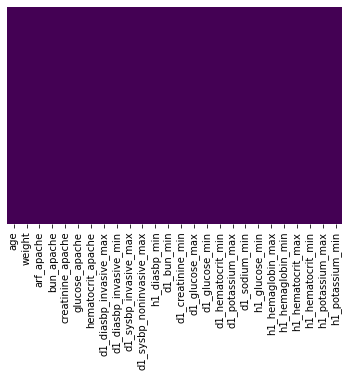

In [31]:
sns.heatmap(numerical_cols.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [32]:
cols=data.columns
num_cols=data._get_numeric_data().columns
cat_cols=list(set(cols)-set(num_cols))
categorical_cols=data[cat_cols]

In [33]:
categorical_cols.iloc[:,:]=si.fit_transform(categorical_cols)

C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-33-bfbbf9691c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_cols.iloc[:,:]=si.fit_transform(categorical_cols)


<AxesSubplot:>

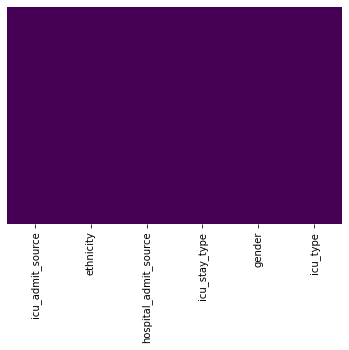

In [34]:
sns.heatmap(categorical_cols.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [35]:
data_new=pd.concat([numerical_cols,categorical_cols],axis=1)

In [36]:
data_new.shape

(10234, 32)

In [37]:
for i in cat_cols:
    i=pd.get_dummies(data_new[i], drop_first=True)
    i=pd.DataFrame(i)
    numerical_cols=pd.concat([numerical_cols, i],axis=1)

In [47]:
len(cat_cols)

6

In [48]:
print(cat_cols)

['icu_admit_source', 'ethnicity', 'hospital_admit_source', 'icu_stay_type', 'gender', 'icu_type']


In [38]:
data_new=numerical_cols

In [39]:
data_new.shape

(10234, 54)

In [40]:
data_new=pd.concat([data_new],axis=1)

In [41]:
data_new.shape

(10234, 54)

In [42]:
data_new.reset_index(inplace=True)

In [43]:
data_new.head()

,index,age,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,hematocrit_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_noninvasive_max,h1_diasbp_min,d1_bun_min,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_min,d1_potassium_max,d1_sodium_min,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_potassium_max,h1_potassium_min,Floor,Operating Room / Recovery,Other Hospital,Other ICU,Asian,Caucasian,Hispanic,Native American,Other/Unknown,Direct Admit,Emergency Department,Floor,ICU to SDU,Operating Room,Other Hospital,Other ICU,Recovery Room,Step-Down Unit (SDU),readmit,transfer,M,CSICU,CTICU,Cardiac ICU,MICU,Med-Surg ICU,Neuro ICU,SICU
0,0,72.0,81.485868,0.0,44.000000,1.490000,97.0000,39.900000,90.790656,50.504465,156.502170,149.0,59.000000,40.0,1.44,104.0,97.0,39.90000,5.7,130.0,104.000000,14.500000,14.500000,42.800000,42.800000,4.900000,4.900000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,86.0,73.939389,0.0,19.000000,0.920000,73.0000,33.488116,86.927223,46.424005,177.003659,181.0,65.000000,19.0,1.00,102.0,73.0,33.26967,3.9,144.0,83.144914,11.425156,11.344616,34.765952,34.509920,3.751773,3.743944,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,72.0,70.916954,0.0,24.000000,0.770000,84.0000,34.800000,74.536216,58.659395,148.025932,146.0,97.000000,16.0,0.77,141.0,84.0,34.80000,3.6,137.0,84.000000,11.800000,11.800000,36.600000,36.600000,3.600000,3.600000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,66.0,80.362470,0.0,28.434107,1.626323,67.9361,34.294330,81.396173,50.413399,153.913781,145.0,63.178116,27.0,1.55,84.0,84.0,34.30000,4.1,136.0,71.876404,11.692125,11.707132,35.048204,35.025545,3.917050,3.920331,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,4,89.0,83.709857,0.0,26.000000,1.500000,99.0000,33.000000,90.250118,48.770416,177.955678,194.0,66.000000,25.0,1.30,159.0,99.0,33.00000,4.0,133.0,149.000000,10.700000,10.700000,33.000000,33.000000,4.000000,4.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [44]:
del data_new['index']

In [46]:
data_new.to_csv('C:\\Users\\sachi\\Downloads\\widsdatathon2021\\processed2.csv')